# My Simple Graph
Example adapted from the lesson

In [86]:
import langgraph.graph as lgg
import logging as log
import pydantic
from IPython.display import Image, display
from typing_extensions import TypedDict

In [87]:
log.basicConfig( level=log.DEBUG)

In [88]:
class State( pydantic.BaseModel):
    _count: int=0
    _graphState:str=''
    
    def increaseCount(self):
        self._count +=1
        
    def appendGraphState(self, text:str):
        self._graphState += ' '+ text
        
    @property
    def graphState(self) -> str:
        return self._graph_state

In [89]:
NodeStart= 'Node Start'
NodeEnd= 'Node End'

In [90]:
def nodeStart( state:State) -> State:
    log.debug('nodeStart executed.')
    state.increaseCount()
    state.appendGraphState('Hi!')
    return state

In [91]:
def nodeEnd( state:State) -> State:
    log.debug('nodeEnd executed.')
    state.increaseCount()
    state.appendGraphState('I am done.')
    return state

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): mermaid.ink:443
DEBUG:urllib3.connectionpool:https://mermaid.ink:443 "GET /img/JSV7aW5pdDogeydmbG93Y2hhcnQnOiB7J2N1cnZlJzogJ2xpbmVhcid9fX0lJQpncmFwaCBURDsKCV9fc3RhcnRfXyhbPHA+X19zdGFydF9fPC9wPl0pOjo6Zmlyc3QKCU5vZGVfU3RhcnQoTm9kZSBTdGFydCkKCU5vZGVfRW5kKE5vZGUgRW5kKQoJX19lbmRfXyhbPHA+X19lbmRfXzwvcD5dKTo6Omxhc3QKCU5vZGVfRW5kIC0tPiBfX2VuZF9fOwoJTm9kZV9TdGFydCAtLT4gTm9kZV9FbmQ7CglfX3N0YXJ0X18gLS0+IE5vZGVfU3RhcnQ7CgljbGFzc0RlZiBkZWZhdWx0IGZpbGw6I2YyZjBmZixsaW5lLWhlaWdodDoxLjIKCWNsYXNzRGVmIGZpcnN0IGZpbGwtb3BhY2l0eTowCgljbGFzc0RlZiBsYXN0IGZpbGw6I2JmYjZmYwo=?type=png&bgColor=!white HTTP/11" 200 8591


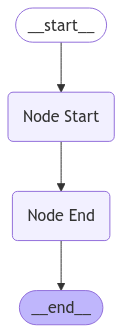

In [92]:
builder= lgg.StateGraph(State)
builder.add_node(NodeStart, nodeStart)
builder.add_node(NodeEnd, nodeEnd)
builder.add_edge( lgg.START, NodeStart)
builder.add_edge( NodeStart, NodeEnd)
builder.add_edge( NodeEnd, lgg.END)

graph = builder.compile()

display(Image( graph.get_graph().draw_mermaid_png()))

In [93]:
initialState= State()
finalState= graph.invoke( initialState)

DEBUG:root:nodeStart executed.
DEBUG:root:nodeEnd executed.


In [94]:
finalState

{'_count': 1, '_graphState': ' I am done.'}